In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset (automatically downloads to kagglehub cache on disk)
dataset_path = kagglehub.dataset_download("bertnardomariouskono/cardiovascular-disease-risk-prediction-dataset")

#Print the location of the dataset
print(f"Data cached at: {dataset_path}")

# Load the CSV file
df = pd.read_csv(f"{dataset_path}/healthcare_synthetic_data.csv")

c:\Users\LT-MSI\.conda\envs\ML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data cached at: C:\Users\LT-MSI\.cache\kagglehub\datasets\bertnardomariouskono\cardiovascular-disease-risk-prediction-dataset\versions\1


In [2]:
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
1,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
2,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
3,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
4,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0


In [3]:
df.dtypes

Patient_ID                     str
Age                          int64
Gender                       int64
Height_cm                  float64
Weight_kg                  float64
BMI                        float64
Systolic_BP                  int64
Diastolic_BP                 int64
Cholesterol_Total            int64
Cholesterol_LDL              int64
Cholesterol_HDL              int64
Fasting_Blood_Sugar          int64
Smoking_Status               int64
Alcohol_Consumption          int64
Physical_Activity_Level      int64
Family_History               int64
Stress_Level                 int64
Sleep_Hours                  int64
Heart_Disease_Risk           int64
dtype: object

**Commentaires** : Quelques variabels sont quantitatives, donc il faut changer leurs types.

In [4]:
df["Gender"] = pd.Categorical(df["Gender"], ordered=False)
df["Smoking_Status"] = pd.Categorical(df["Smoking_Status"], ordered=False)
df["Physical_Activity_Level"] = pd.Categorical(df["Physical_Activity_Level"], ordered=True)
df["Alcohol_Consumption"] = pd.Categorical(df["Alcohol_Consumption"], ordered=True)
df["Family_History"] = pd.Categorical(df["Family_History"], ordered=False)
df["Heart_Disease_Risk"] = pd.Categorical(df["Heart_Disease_Risk"], ordered=False)

In [5]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Stress_Level,Sleep_Hours
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.538133,165.336767,75.252573,27.446080,135.117667,90.541267,216.248000,140.355267,43.307867,99.670200,5.503667,6.506067
std,11.875294,9.186313,14.110559,4.134953,11.260634,8.443095,22.692222,17.914089,5.963153,15.261355,2.874277,1.212626
min,25.000000,138.500000,33.700000,14.500000,90.000000,60.000000,127.000000,70.000000,20.000000,60.000000,1.000000,4.000000
25%,46.000000,158.500000,65.200000,24.500000,127.000000,85.000000,201.000000,128.000000,39.000000,89.000000,3.000000,6.000000
50%,55.000000,164.700000,73.900000,27.200000,135.000000,91.000000,216.000000,140.000000,43.000000,99.000000,5.500000,7.000000
75%,63.000000,172.000000,83.900000,30.000000,143.000000,96.000000,231.000000,152.000000,47.000000,110.000000,8.000000,7.000000
max,85.000000,198.100000,150.100000,46.100000,182.000000,120.000000,303.000000,210.000000,68.000000,167.000000,10.000000,10.000000


In [6]:
df.dtypes

Patient_ID                      str
Age                           int64
Gender                     category
Height_cm                   float64
Weight_kg                   float64
BMI                         float64
Systolic_BP                   int64
Diastolic_BP                  int64
Cholesterol_Total             int64
Cholesterol_LDL               int64
Cholesterol_HDL               int64
Fasting_Blood_Sugar           int64
Smoking_Status             category
Alcohol_Consumption        category
Physical_Activity_Level    category
Family_History             category
Stress_Level                  int64
Sleep_Hours                   int64
Heart_Disease_Risk         category
dtype: object

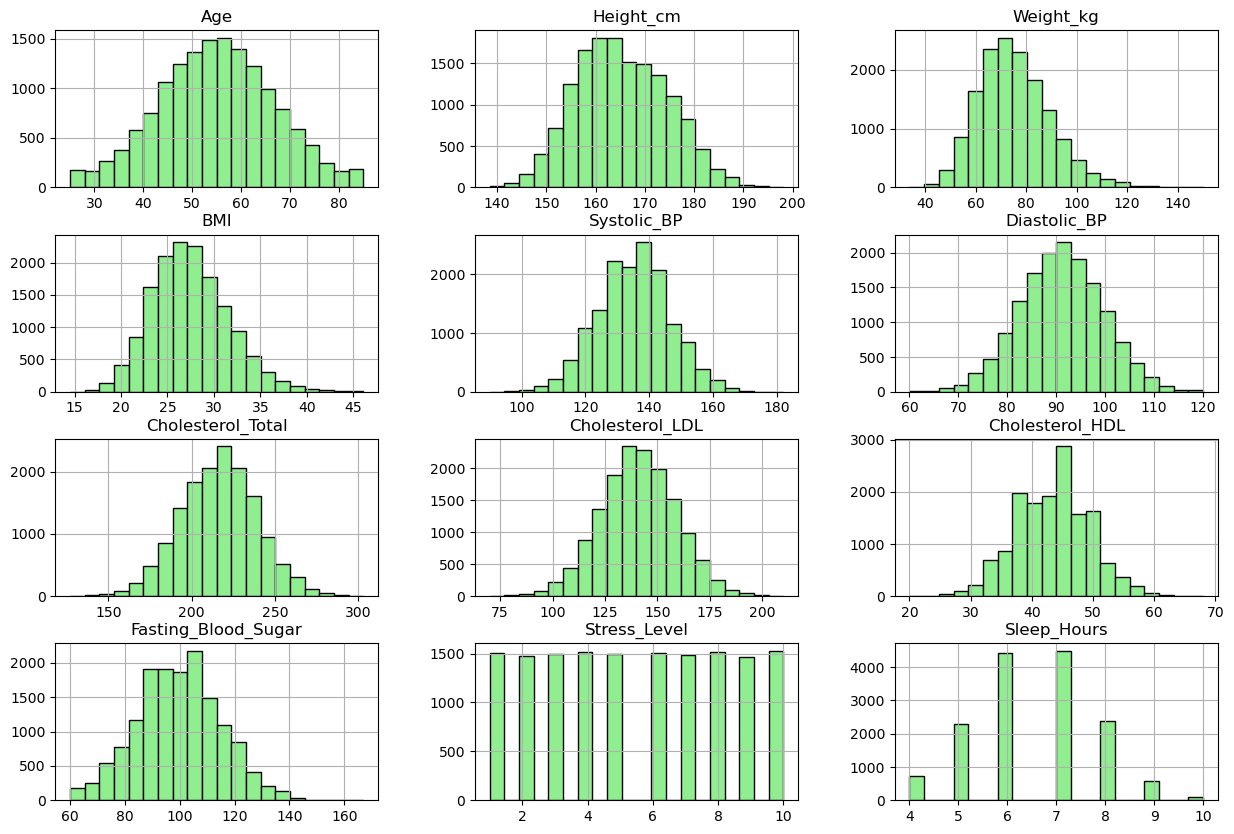

In [7]:
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(15, 10), color='lightgreen', edgecolor='black')
plt.show()

In [8]:
# Get all categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
df[categorical_cols].describe()

,Gender,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Heart_Disease_Risk
count,15000,15000,15000,15000,15000,15000
unique,2,2,3,4,2,2
top,0,0,0,1,0,0
freq,7622,10495,7502,6009,12757,8460


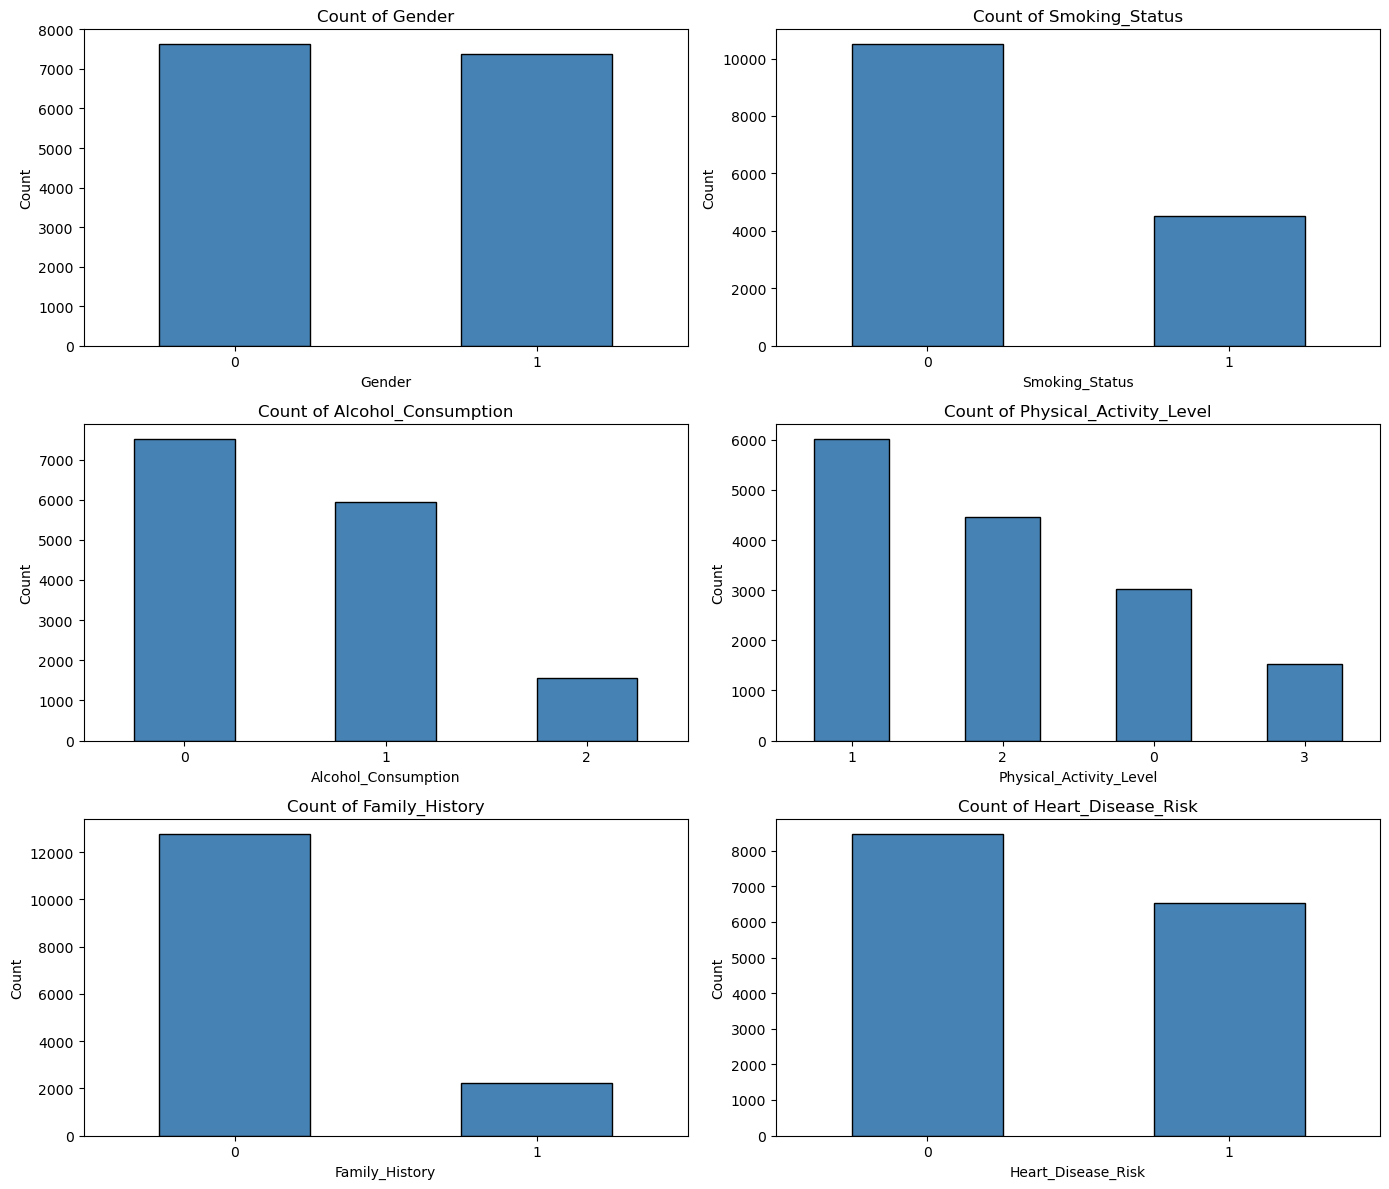

In [23]:
# Plot bar plots for all categorical variables
n_plots = len(categorical_cols)

fig, axes = plt.subplots((n_plots + 1) // 2, 2, figsize=(14, 4 * ((n_plots + 1) // 2)))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Count of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', labelrotation=0)

# Remove extra subplots
for idx in range(n_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


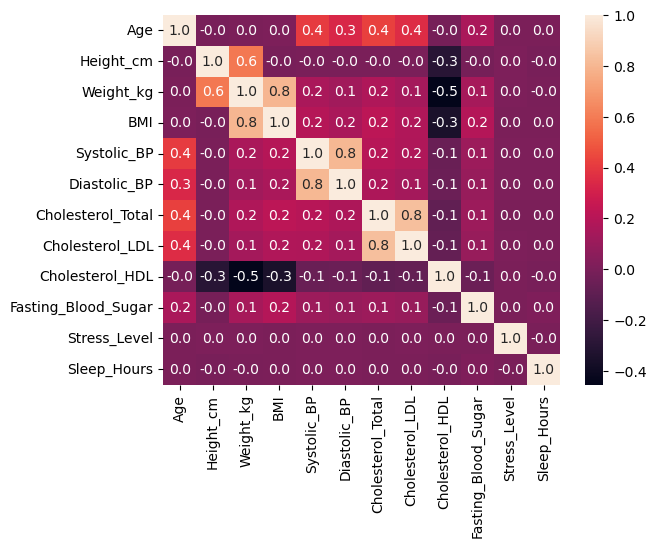

In [25]:
##Corrélation

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f')
plt.show()
